In [27]:
import numpy as np
import pandas as pd
import os
from scipy import stats 
import matplotlib.pylab as pl

%matplotlib inline

In [3]:
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
            os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
                os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [6]:
datestring = '201512'
getCitiBikeCSV(datestring)

('Downloading', '201512')
file in place, you can continue


In [7]:
data = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1
1,684,12/1/2015 07:38:15,12/1/2015 07:49:39,72,W 52 St & 11 Ave,40.767272,-73.993929,520,W 52 St & 5 Ave,40.759923,-73.976485,17787,Subscriber,1975.0,1
2,1063,12/1/2015 07:44:49,12/1/2015 08:02:33,72,W 52 St & 11 Ave,40.767272,-73.993929,358,Christopher St & Greenwich St,40.732916,-74.007114,18797,Subscriber,1966.0,1
3,1075,12/1/2015 08:02:29,12/1/2015 08:20:24,72,W 52 St & 11 Ave,40.767272,-73.993929,505,6 Ave & W 33 St,40.749013,-73.988484,14625,Subscriber,1985.0,1
4,293,12/1/2015 08:06:37,12/1/2015 08:11:30,72,W 52 St & 11 Ave,40.767272,-73.993929,525,W 34 St & 11 Ave,40.755942,-74.002116,21238,Subscriber,1968.0,1


In [14]:
data['age'] = 2015 - data['birth year']

In [19]:
data['age'].dropna(inplace = True)

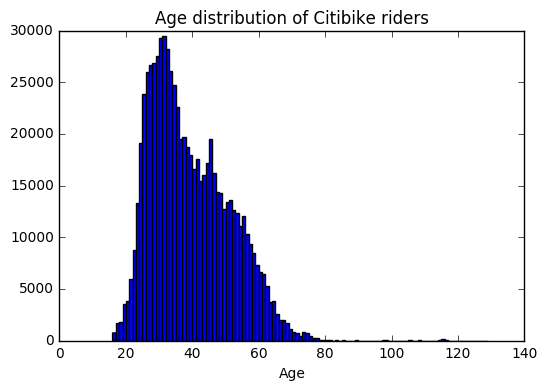

In [21]:
bins = np.arange(data.age.min(), data.age.max(), 1)
pl.hist(data.age, bins)
pl.title('Age distribution of Citibike riders')
pl.xlabel('Age')

In [23]:
print data.age.mean(), data.age.std()

38.7211306516 11.832226397


#### Caption
The age distribution of Citibike riders seems to be skewed to the right, with a few outliers at around 100 to 120 years old. 

### K-S test

Null hypothesis: The data on age of Citibike riders in December 2015 is normally distributed, alpha = 0.05

In [34]:
stats.kstest?

In [33]:
stats.kstest(data.age, 'norm' , args = (data.age.mean(), data.age.std()))

KstestResult(statistic=0.099562120297477685, pvalue=0.0)

In [35]:
stats.kstest(data.age, 'poisson' , args=(data.age.mean(), data.age.std()))

KstestResult(statistic=0.56044431720790422, pvalue=0.0)

In [36]:
stats.kstest(data.age, 'logistic' , args=(data.age.mean(), data.age.std()))

KstestResult(statistic=0.17354632378036255, pvalue=0.0)

In [37]:
stats.kstest(data.age, 'expon' , args=(data.age.mean(), data.age.std()))

KstestResult(statistic=0.55501886993133853, pvalue=0.0)

### A-D test


In [38]:
stats.anderson(data.age, dist = 'norm')

AndersonResult(statistic=9139.2269652225077, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

In [40]:
stats.anderson(data.age, dist = 'expon')

AndersonResult(statistic=167035.06218633091, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

Conclusion: Both K-S nor A-D test resulted in rejection of the null hypothesis, therefore we can assume that the data on ages of Citibike riders is not normally dist